In [1]:
#!gdown 15ZSv_07b3HCKKn08jSDLl4JO4EFy8t-t

#!tar -xzf aclImdb_v1.tar.gz
#!rm -r aclImdb/train/unsup

In [2]:
from dotenv import load_dotenv
load_dotenv('../.env')


True

In [3]:

import keras

train_ds, val_ds = keras.utils.text_dataset_from_directory(
    '../data/aclImdb/train', validation_split=0.2, subset='both', seed=42
)
test_ds = keras.utils.text_dataset_from_directory('../data/aclImdb/test')

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


2025-08-12 07:51:28.729052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-08-12 07:51:28.729229: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-08-12 07:51:28.729240: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-08-12 07:51:28.729256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-12 07:51:28.729267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 25000 files belonging to 2 classes.


In [4]:
feature, target = train_ds.unbatch().take(1).get_single_element()
print(feature.numpy()[:100])
print(target.numpy())

b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell '
0


In [5]:
import keras_nlp

classifier = keras_nlp.models.BertClassifier.from_preset(
    'bert_tiny_en_uncased',
    # 'bert_base_en_uncased',
    num_classes=2,
)

classifier.summary()

Preprocessor: "bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,178 (16.73 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True,
)

In [7]:
hist_multi = classifier.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping_cb])
hist = hist_multi

Epoch 1/100


2025-08-12 07:51:32.196064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - loss: 0.5684 - sparse_categorical_accuracy: 0.6962 - val_loss: 0.3589 - val_sparse_categorical_accuracy: 0.8482
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - loss: 0.3194 - sparse_categorical_accuracy: 0.8675 - val_loss: 0.2990 - val_sparse_categorical_accuracy: 0.8764
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - loss: 0.2494 - sparse_categorical_accuracy: 0.9048 - val_loss: 0.2907 - val_sparse_categorical_accuracy: 0.8812
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - loss: 0.1975 - sparse_categorical_accuracy: 0.9276 - val_loss: 0.3267 - val_sparse_categorical_accuracy: 0.8786
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - loss: 0.1450 - sparse_categorical_accuracy: 0.9476 - val_loss: 0.3375 - val_sparse_categorical_accuracy: 0.8816
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.3606 - val_sparse_categorical_accuracy: 0.881

In [8]:
hist_multi.history

{'loss': [0.46745365858078003,
  0.3030501902103424,
  0.23804526031017303,
  0.18354249000549316,
  0.1380123645067215,
  0.0992596223950386],
 'sparse_categorical_accuracy': [0.7771000266075134,
  0.8753499984741211,
  0.9075499773025513,
  0.932449996471405,
  0.9504500031471252,
  0.96670001745224],
 'val_loss': [0.3589136302471161,
  0.2990482449531555,
  0.2907133400440216,
  0.32670095562934875,
  0.33751484751701355,
  0.36057543754577637],
 'val_sparse_categorical_accuracy': [0.8482000231742859,
  0.8763999938964844,
  0.8812000155448914,
  0.878600001335144,
  0.881600022315979,
  0.8809999823570251]}

In [9]:
import keras_nlp

classifier = keras_nlp.models.BertClassifier.from_preset(
    'bert_tiny_en_uncased',
    num_classes=1,
    activation='sigmoid',
)

rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
classifier.compile(
    loss='binary_crossentropy',
    #optimizer=rmsprop,
    metrics=['accuracy']
)

hist_bin = classifier.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping_cb])
hist = hist_bin

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.6661 - loss: 0.5982 - val_accuracy: 0.8196 - val_loss: 0.4079
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8643 - loss: 0.3307 - val_accuracy: 0.8740 - val_loss: 0.3058
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8971 - loss: 0.2585 - val_accuracy: 0.8782 - val_loss: 0.3020


In [10]:
hist.history

{'accuracy': [0.7599499821662903, 0.8758500218391418, 0.9053999781608582],
 'loss': [0.49218007922172546, 0.3070255219936371, 0.24055956304073334],
 'val_accuracy': [0.819599986076355, 0.8740000128746033, 0.8781999945640564],
 'val_loss': [0.40785276889801025, 0.30582988262176514, 0.30200156569480896]}

In [24]:
hist = hist_multi

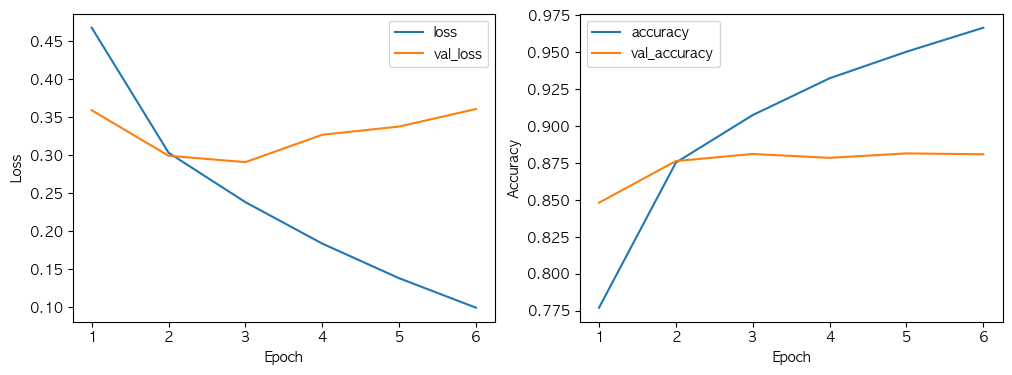

In [26]:
from matplotlib import pyplot as plt
import numpy as np

epochs = np.array(hist.epoch) + 1
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history['loss'], label='loss')
axs[0].plot(epochs, hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(epochs)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, hist.history['sparse_categorical_accuracy'], label='accuracy')
axs[1].plot(epochs, hist.history['val_sparse_categorical_accuracy'], label='val_accuracy')
axs[1].set_xticks(epochs)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

axs[1].legend()
plt.show()

In [12]:
from datasets import load_dataset

#nsmc = load_dataset('e9t/nsmc', trust_remote_code=True)
nsmc = load_dataset('Blpeng/nsmc', trust_remote_code=True)
nsmc

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Blpeng/nsmc' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'id', 'document', 'label'],
        num_rows: 50000
    })
})

In [13]:
# 불필요한 열 삭제 및 누락된 데이터 삭제
from datasets import DatasetDict

nsmc = nsmc.map(remove_columns=["Unnamed: 0"])
nsmc = DatasetDict({
    split: nsmc[split].filter(lambda x: x['document'] and x['document'].strip())
    for split in nsmc})

In [14]:
nsmc['train'][0]

{'id': 9976970, 'document': '아 더빙.. 진짜 짜증나네요 목소리', 'label': 0}

In [15]:
from huggingface_hub import list_datasets
all_datasets = [ds.id for ds in list_datasets()]

for ds in all_datasets:
    if 'nsmc' in ds:
        print(ds)


# print(all_datasets)
print(len(all_datasets))


e9t/nsmc
Blpeng/nsmc
iamyuna/kcbert-nsmc-tokenizer
brandonsmckay/embeddingstest
ynsmcd/nesd
ynsmcd/twiiter
ynsmcd/slownesd
ynsmcd/SPE
ynsmcd/lolo
ynsmcd/amara
470438


In [16]:
#!uv add datasets evaluate
from transformers import AutoModelForSequenceClassification, AutoTokenizer

bert_kor = AutoModelForSequenceClassification.from_pretrained(
    #'bert-base-multilingual-cased',
    'bongsoo/bert-small-kor-v1',
     num_labels=2,
     hidden_dropout_prob=0.3,      # hidden layer dropout
     attention_probs_dropout_prob=0.3  # attention dropout
)

bert_kor_tokenizer = AutoTokenizer.from_pretrained('bongsoo/bert-small-kor-v1')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bongsoo/bert-small-kor-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
bert_kor

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(10022, 512, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-3): 4 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=512, out_features=512, bias=True)
              (key): Linear(in_features=512, out_features=512, bias=True)
              (value): Linear(in_features=512, out_features=512, bias=True)
              (dropout): Dropout(p=0.3, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=512, out_features=512, bias=True)
              (LayerNorm): LayerNorm((512,), eps=1e-1

In [18]:
def tokenize(batch):
    # batch['document']가 문자열 리스트임을 명시적으로 보장
    texts = [str(doc) for doc in batch['document']]
    return bert_kor_tokenizer(
        texts,
        padding=True,
        truncation=True,
        # max_length=512,
        # return_tensors=None
    )

nsmc_tokenized = nsmc.map(tokenize, batched=True, batch_size=None)
#nsmc_tokenized

Map:   0%|          | 0/149995 [00:00<?, ? examples/s]

In [19]:
print(nsmc_tokenized)

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 149995
    })
    test: Dataset({
        features: ['id', 'document', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 49997
    })
})


In [20]:
nsmc_train = nsmc_tokenized['train'].shuffle(seed=42).select(range(50000))
nsmc_test = nsmc_tokenized['test'].shuffle(seed=42).select(range(10000))

In [21]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir='bert_kor_nsmc_02',
    num_train_epochs=20,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_strategy='steps',  # 로깅 전략 추가
    logging_steps=len(nsmc_train) // 8,  # 오타 수정
    eval_steps=len(nsmc_train) // 4,  # eval 주기 설정
    load_best_model_at_end=True,
    metric_for_best_model='eval_accuracy',  # 최고 모델 선택 기준
    greater_is_better=True,
    report_to='none',
    #report_to='wandb',
    dataloader_pin_memory=False,  # 메모리 효율성
    weight_decay=0.01,
    warmup_steps=500,
    learning_rate=2e-5,
)

# training set의 작은 subset으로 train eval 생성 (메모리 절약)
nsmc_train_eval = nsmc_train.select(range(min(2000, len(nsmc_train))))

trainer = Trainer(
    model=bert_kor,
    args=training_args,
    train_dataset=nsmc_train,
    eval_dataset=nsmc_test,  # validation용
    compute_metrics=compute_metrics,
)

# 수동으로 train set evaluation 추가하는 방법
class CustomTrainer(Trainer):
    def evaluate(self, eval_dataset=None, ignore_keys=None, metric_key_prefix="eval"):
        # 먼저 기본 eval_dataset (test) 평가
        eval_results = super().evaluate(eval_dataset, ignore_keys, metric_key_prefix)
        
        # train dataset도 평가 (subset 사용)
        train_results = super().evaluate(nsmc_train_eval, ignore_keys, "train")
        
        # 결과 합치기
        eval_results.update(train_results)
        return eval_results

custom_trainer = CustomTrainer(
    model=bert_kor,
    args=training_args,
    train_dataset=nsmc_train,
    eval_dataset=nsmc_test,
    compute_metrics=compute_metrics,
)

custom_trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=3))

custom_trainer.train()

  0%|          | 0/125000 [00:00<?, ?it/s]

{'loss': 0.5003, 'grad_norm': 7.763807773590088, 'learning_rate': 1.9076305220883535e-05, 'epoch': 1.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4515933096408844, 'eval_accuracy': 0.8247, 'eval_runtime': 15.3865, 'eval_samples_per_second': 649.92, 'eval_steps_per_second': 81.24, 'epoch': 1.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.4370386302471161, 'train_accuracy': 0.818, 'train_runtime': 2.9788, 'train_samples_per_second': 671.405, 'train_steps_per_second': 83.926, 'epoch': 1.0}
{'loss': 0.4167, 'grad_norm': 12.935795783996582, 'learning_rate': 1.807228915662651e-05, 'epoch': 2.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4396882951259613, 'eval_accuracy': 0.8275, 'eval_runtime': 15.3192, 'eval_samples_per_second': 652.774, 'eval_steps_per_second': 81.597, 'epoch': 2.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.39376300573349, 'train_accuracy': 0.841, 'train_runtime': 2.8905, 'train_samples_per_second': 691.912, 'train_steps_per_second': 86.489, 'epoch': 2.0}
{'loss': 0.3862, 'grad_norm': 15.056137084960938, 'learning_rate': 1.7068273092369478e-05, 'epoch': 3.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4435461461544037, 'eval_accuracy': 0.8427, 'eval_runtime': 15.1762, 'eval_samples_per_second': 658.925, 'eval_steps_per_second': 82.366, 'epoch': 3.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.37871724367141724, 'train_accuracy': 0.855, 'train_runtime': 3.1162, 'train_samples_per_second': 641.811, 'train_steps_per_second': 80.226, 'epoch': 3.0}
{'loss': 0.3719, 'grad_norm': 11.66916275024414, 'learning_rate': 1.606425702811245e-05, 'epoch': 4.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.42280706763267517, 'eval_accuracy': 0.8395, 'eval_runtime': 15.5036, 'eval_samples_per_second': 645.012, 'eval_steps_per_second': 80.627, 'epoch': 4.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.32195237278938293, 'train_accuracy': 0.8735, 'train_runtime': 3.0884, 'train_samples_per_second': 647.581, 'train_steps_per_second': 80.948, 'epoch': 4.0}
{'loss': 0.3529, 'grad_norm': 5.553444862365723, 'learning_rate': 1.5060240963855424e-05, 'epoch': 5.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.40312445163726807, 'eval_accuracy': 0.8508, 'eval_runtime': 15.4531, 'eval_samples_per_second': 647.119, 'eval_steps_per_second': 80.89, 'epoch': 5.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.2917196750640869, 'train_accuracy': 0.8835, 'train_runtime': 2.935, 'train_samples_per_second': 681.432, 'train_steps_per_second': 85.179, 'epoch': 5.0}
{'loss': 0.3423, 'grad_norm': 5.898165702819824, 'learning_rate': 1.4056224899598394e-05, 'epoch': 6.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4747602939605713, 'eval_accuracy': 0.849, 'eval_runtime': 15.3052, 'eval_samples_per_second': 653.374, 'eval_steps_per_second': 81.672, 'epoch': 6.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.313717246055603, 'train_accuracy': 0.8935, 'train_runtime': 2.9961, 'train_samples_per_second': 667.537, 'train_steps_per_second': 83.442, 'epoch': 6.0}
{'loss': 0.3363, 'grad_norm': 14.225591659545898, 'learning_rate': 1.3052208835341367e-05, 'epoch': 7.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.45982158184051514, 'eval_accuracy': 0.8472, 'eval_runtime': 15.5741, 'eval_samples_per_second': 642.091, 'eval_steps_per_second': 80.261, 'epoch': 7.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.2863853871822357, 'train_accuracy': 0.8945, 'train_runtime': 3.02, 'train_samples_per_second': 662.257, 'train_steps_per_second': 82.782, 'epoch': 7.0}
{'loss': 0.3264, 'grad_norm': 12.090903282165527, 'learning_rate': 1.204819277108434e-05, 'epoch': 8.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.5196211338043213, 'eval_accuracy': 0.8485, 'eval_runtime': 15.1902, 'eval_samples_per_second': 658.319, 'eval_steps_per_second': 82.29, 'epoch': 8.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.30771487951278687, 'train_accuracy': 0.899, 'train_runtime': 2.9319, 'train_samples_per_second': 682.161, 'train_steps_per_second': 85.27, 'epoch': 8.0}
{'train_runtime': 2093.2752, 'train_samples_per_second': 477.72, 'train_steps_per_second': 59.715, 'train_loss': 0.3791350146484375, 'epoch': 8.0}


TrainOutput(global_step=50000, training_loss=0.3791350146484375, metrics={'train_runtime': 2093.2752, 'train_samples_per_second': 477.72, 'train_steps_per_second': 59.715, 'total_flos': 4387541673600000.0, 'train_loss': 0.3791350146484375, 'epoch': 8.0})

=== 학습 로그 분석 중... ===
총 로그 엔트리: 25개
📈 Train 데이터 포인트: 8개
📈 Validation 데이터 포인트: 8개
🔍 Train 길이 체크: epochs(8), loss(8), acc(8)
🔍 Val 길이 체크: epochs(8), loss(8), acc(8)


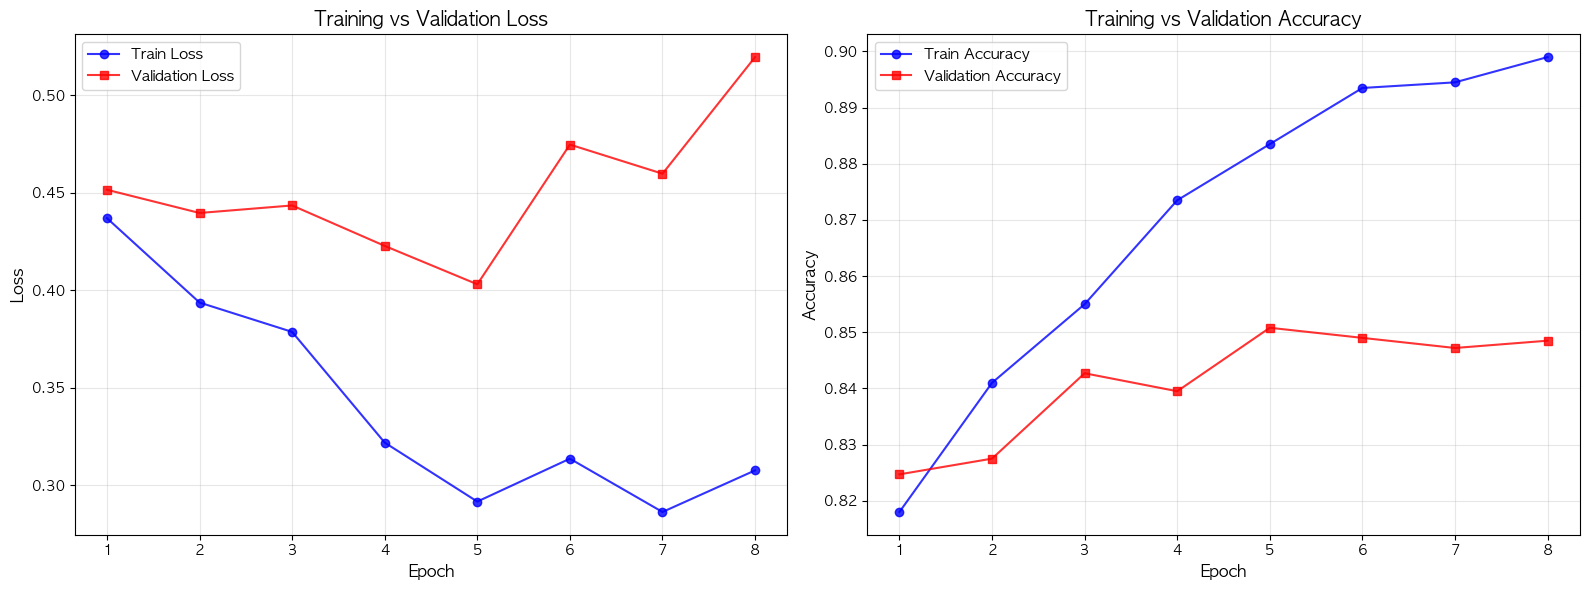


📊 최종 학습 성능 요약
🔹 Train Loss:      0.3077
🔹 Validation Loss: 0.5196
🔹 Train Accuracy:  89.90%
🔹 Val Accuracy:    84.85%

🔍 과적합 진단:
   Loss 차이:     +0.2119 (Val - Train)
   Accuracy 차이: +5.05% (Train - Val)

🟡 결론: ⚠️ 경미한 과적합

🏆 최고 검증 정확도: 85.08% (Epoch 5.0)


In [22]:
# 📊 Train vs Validation 학습 곡선 분석
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥OS용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

print("=== 학습 로그 분석 중... ===")

# 1. 로그 히스토리에서 메트릭 추출 (안전한 방식)
logs = custom_trainer.state.log_history

print(f"총 로그 엔트리: {len(logs)}개")

# Train 메트릭과 Validation 메트릭을 분리하여 추출
train_data = []
val_data = []

for log in logs:
    # Train 메트릭이 있는 로그 (train_loss와 train_accuracy가 모두 있어야 함)
    if 'train_loss' in log and 'train_accuracy' in log and 'epoch' in log:
        train_data.append({
            'epoch': log['epoch'],
            'loss': log['train_loss'],
            'accuracy': log['train_accuracy']
        })
    
    # Validation 메트릭이 있는 로그 (train 메트릭이 없는 것만)
    elif 'eval_loss' in log and 'eval_accuracy' in log and 'epoch' in log and 'train_loss' not in log:
        val_data.append({
            'epoch': log['epoch'],
            'loss': log['eval_loss'],
            'accuracy': log['eval_accuracy']
        })

# 데이터 정렬 (epoch 순서대로)
train_data.sort(key=lambda x: x['epoch'])
val_data.sort(key=lambda x: x['epoch'])

# 리스트로 변환
train_epochs = [d['epoch'] for d in train_data]
train_loss = [d['loss'] for d in train_data]
train_accuracy = [d['accuracy'] for d in train_data]

val_epochs = [d['epoch'] for d in val_data]
val_loss = [d['loss'] for d in val_data]
val_accuracy = [d['accuracy'] for d in val_data]

print(f"📈 Train 데이터 포인트: {len(train_loss)}개")
print(f"📈 Validation 데이터 포인트: {len(val_loss)}개")
print(f"🔍 Train 길이 체크: epochs({len(train_epochs)}), loss({len(train_loss)}), acc({len(train_accuracy)})")
print(f"🔍 Val 길이 체크: epochs({len(val_epochs)}), loss({len(val_loss)}), acc({len(val_accuracy)})")

# 2. 학습 곡선 그래프
plt.figure(figsize=(16, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
if train_loss and train_epochs:
    plt.plot(train_epochs, train_loss, 'o-', label='Train Loss', color='blue', markersize=6, alpha=0.8)
if val_loss and val_epochs:
    plt.plot(val_epochs, val_loss, 's-', label='Validation Loss', color='red', markersize=6, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Accuracy 그래프
plt.subplot(1, 2, 2)
if train_accuracy and train_epochs:
    plt.plot(train_epochs, train_accuracy, 'o-', label='Train Accuracy', color='blue', markersize=6, alpha=0.8)
if val_accuracy and val_epochs:
    plt.plot(val_epochs, val_accuracy, 's-', label='Validation Accuracy', color='red', markersize=6, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 성능 분석 및 과적합 진단
if train_loss and val_loss and train_accuracy and val_accuracy:
    final_train_loss = train_loss[-1]
    final_val_loss = val_loss[-1]
    final_train_acc = train_accuracy[-1]
    final_val_acc = val_accuracy[-1]
    
    print("\n" + "="*50)
    print("📊 최종 학습 성능 요약")
    print("="*50)
    print(f"🔹 Train Loss:      {final_train_loss:.4f}")
    print(f"🔹 Validation Loss: {final_val_loss:.4f}")
    print(f"🔹 Train Accuracy:  {final_train_acc:.2%}")
    print(f"🔹 Val Accuracy:    {final_val_acc:.2%}")
    
    # 과적합 진단
    loss_gap = final_val_loss - final_train_loss
    acc_gap = final_train_acc - final_val_acc
    
    print(f"\n🔍 과적합 진단:")
    print(f"   Loss 차이:     {loss_gap:+.4f} (Val - Train)")
    print(f"   Accuracy 차이: {acc_gap:+.2%} (Train - Val)")
    
    # 진단 결과
    if abs(acc_gap) < 0.02:  # 2% 미만
        status = "✅ 우수한 일반화 성능"
        color = "🟢"
    elif abs(acc_gap) < 0.05:  # 5% 미만
        status = "✅ 좋은 일반화 성능"
        color = "🟢"
    elif abs(acc_gap) < 0.10:  # 10% 미만
        status = "⚠️ 경미한 과적합"
        color = "🟡"
    elif abs(acc_gap) < 0.20:  # 20% 미만
        status = "⚠️ 중간 수준 과적합"
        color = "🟡"
    else:
        status = "🚨 심각한 과적합"
        color = "🔴"
    
    print(f"\n{color} 결론: {status}")
    
    # 최고 성능 찾기
    if val_accuracy:
        best_val_acc = max(val_accuracy)
        best_epoch = val_epochs[val_accuracy.index(best_val_acc)]
        print(f"\n🏆 최고 검증 정확도: {best_val_acc:.2%} (Epoch {best_epoch:.1f})")
        
else:
    print("\n⚠️ Train 메트릭이 충분하지 않습니다.")
    print("다음 학습에서는 전체 과정이 기록될 것입니다.")
